In [628]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd

import utils

pd.set_option('display.max_columns', None)

In [629]:
tracks = utils.load('data/fma_metadata/tracks.csv')
genres = utils.load('data/fma_metadata/genres.csv')
features_df = utils.load('data/fma_metadata/features.csv')
echonest = utils.load('data/fma_metadata/echonest.csv')

In [1229]:
sns.set_theme(style="whitegrid")

In [800]:
tracks_genres_info = tracks['track'][['genre_top', 'genres', 'genres_all']] 

tracks_genres_info['track_id'] = tracks_genres_info.index  # Needed for further operations

null_top_genre_mask_mask = tracks_genres_info.genre_top.isnull()

null_top_genre_tracks_df = tracks_genres_info.loc[null_top_genre_mask_mask,:]

not_null_top_genre_tracks_df = tracks_genres_info.loc[~null_top_genre_mask_mask,:]

def transform_genres_list_to_str(genres_list):
    return "|".join([str(x) for x in genres_list])

null_top_genre_tracks_df['genres_str'] = null_top_genre_tracks_df.genres.apply(transform_genres_list_to_str)
null_top_genre_tracks_df['genres_all_str'] = null_top_genre_tracks_df.genres_all.apply(transform_genres_list_to_str)

print(null_top_genre_tracks_df.head())

In [801]:
_df = null_top_genre_tracks_df.set_index('track_id').genres_str.str.split('|', expand=True).stack()

In [802]:
def choosing_top_genre(genres_list, genres_df, target_genres=[21, 10, 12, 3, 4]): # 21 -> Hip-Hop, 10 -> Pop, 3 -> Blues, 4 -> Jazz, 12 -> Rock
    _genres = {
        10: "Pop",
        12: "Rock",
        21: "Hip-Hop",
        3: "Blues",
        4: "Jazz"
    }
    for genre_id in genres_list:
        top_level = genres_df.loc[genre_id,'top_level']
        if top_level in target_genres:
            return _genres[top_level]
    return np.NaN




In [803]:
null_top_genre_tracks_df.isnull().sum()

genre_top         56976
genres                0
genres_all            0
track_id              0
genres_str            0
genres_all_str        0
dtype: int64

In [807]:
null_top_genre_tracks_df['derived_genre_top'] = null_top_genre_tracks_df.genres.apply(choosing_top_genre, args=(genres,))

(~null_top_genre_tracks_df.isnull()).sum()
# Agregamos 32249 que no tenían top_genre derivandolo de su campo "genres"

/Users/rafa/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


genre_top                0
genres               56976
genres_all           56976
track_id             56976
genres_str           56976
genres_all_str       56976
derived_genre_top    32249
dtype: int64

In [812]:
null_top_genre_tracks_df[~null_top_genre_tracks_df.derived_genre_top.isnull()].sample(10)

,genre_top,genres,genres_all,track_id,genres_str,genres_all_str,derived_genre_top
track_id,,,,,,,
19620,NaN,"[19, 27, 311]","[12, 13, 14, 19, 311, 27]",19620,19|27|311,12|13|14|19|311|27,Rock
48696,NaN,"[10, 12, 15]","[10, 12, 15]",48696,10|12|15,10|12|15,Pop
24285,NaN,"[38, 185, 337, 542]","[38, 15, 337, 21, 185, 542]",24285,38|185|337|542,38|15|337|21|185|542,Hip-Hop
13700,NaN,"[1, 10, 15, 38, 76]","[1, 38, 10, 76, 15]",13700,1|10|15|38|76,1|38|10|76|15,Pop
111532,NaN,"[15, 66, 76]","[66, 10, 12, 76, 15]",111532,15|66|76,66|10|12|76|15,Rock
27963,NaN,"[2, 74, 250]","[2, 4, 38, 74, 250]",27963,2|74|250,2|4|38|74|250,Jazz
97115,NaN,"[77, 362]","[2, 10, 77, 362]",97115,77|362,2|10|77|362,Pop
56278,NaN,"[10, 27]","[10, 27, 12]",56278,10|27,10|27|12,Pop
95705,NaN,"[109, 185]","[185, 12, 109, 15, 25]",95705,109|185,185|12|109|15|25,Rock


In [818]:
original_genre_top_selected_genres_mask = (tracks_genres_info.genre_top == 'Hip-Hop') | (tracks_genres_info.genre_top == 'Pop') | (tracks_genres_info.genre_top == 'Rock') | (tracks_genres_info.genre_top == 'Blues')  | (tracks_genres_info.genre_top == 'Jazz')

print(tracks_genres_info[original_genre_top_selected_genres_mask].shape)

selected_genres_mask = (tracks_genres_info.genre_top == 'Hip-Hop') | (tracks_genres_info.genre_top == 'Pop') | (tracks_genres_info.genre_top == 'Rock') | (tracks_genres_info.genre_top == 'Blues')  | (tracks_genres_info.genre_top == 'Jazz') | (~null_top_genre_tracks_df[].derived_genre_top.isnull())

print(tracks_genres_info[selected_genres_mask].shape)

#We have derived more than 30 k from selected genres and added to top_genre

(20747, 4)
(52996, 4)


In [855]:
# Adding derived to a new DF

tracks_info_with_derived_top_genre_df = tracks_genres_info.copy()
tracks_info_with_derived_top_genre_df["_genre_top"] = ''

tracks_info_with_derived_top_genre_df.head()

,genre_top,genres,genres_all,track_id,_genre_top
track_id,,,,,
2,Hip-Hop,[21],[21],2,
3,Hip-Hop,[21],[21],3,
5,Hip-Hop,[21],[21],5,
10,Pop,[10],[10],10,
20,NaN,"[76, 103]","[17, 10, 76, 103]",20,


In [951]:
_df = null_top_genre_tracks_df[~null_top_genre_tracks_df.derived_genre_top.isnull()]

for index, row in tracks_genres_info.iterrows():
    if isinstance(row.genre_top, str) or (~np.isnan(row.genre_top)):
        tracks_info_with_derived_top_genre_df.at[index, '_genre_top'] = row.genre_top
    elif index in _df.index:
        tracks_info_with_derived_top_genre_df.at[index, '_genre_top'] = _df.at[index,'derived_genre_top']

In [952]:
print((~tracks_info_with_derived_top_genre_df.genre_top.isnull()).sum())
print((~tracks_info_with_derived_top_genre_df._genre_top.isnull()).sum())

49598
81847


In [953]:
_mask  = (tracks_info_with_derived_top_genre_df._genre_top == 'Hip-Hop') | (tracks_info_with_derived_top_genre_df._genre_top == 'Pop') | (tracks_info_with_derived_top_genre_df._genre_top == 'Rock') | (tracks_info_with_derived_top_genre_df._genre_top == 'Blues')  | (tracks_info_with_derived_top_genre_df._genre_top == 'Jazz')  

tracks_with_derived_top_genre = list(tracks_info_with_derived_top_genre_df[_mask].index)

tracks_with_derived_top_genre_has_features = []

for track_id in list(echonest.echonest.audio_features.index):
    if track_id in tracks_with_derived_top_genre:
        tracks_with_derived_top_genre_has_features.append(track_id)

len(tracks_with_derived_top_genre_has_features)

8402

In [954]:
genre_fatures_df = pd.concat([echonest.echonest.audio_features[echonest.index.isin(tracks_with_derived_top_genre_has_features)], tracks_info_with_derived_top_genre_df._genre_top[tracks_info_with_derived_top_genre_df.index.isin(tracks_with_derived_top_genre_has_features)]], 1)

/Users/rafa/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

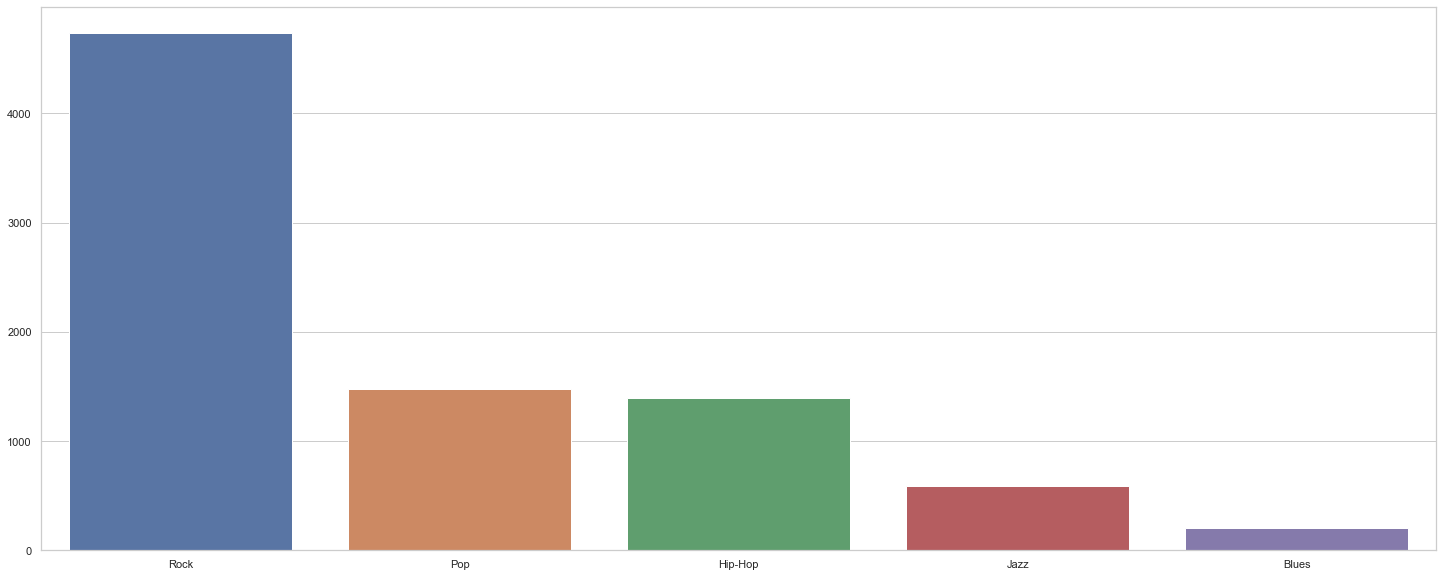

In [955]:
sns.barplot(genre_fatures_df._genre_top.value_counts().index[0:5], genre_fatures_df._genre_top.value_counts().values[0:5], order=list(genre_fatures_df._genre_top.value_counts().index[0:5]))

In [956]:
genre_fatures_df._genre_top.value_counts()

Rock       4739
Pop        1473
Hip-Hop    1397
Jazz        587
Blues       206
Name: _genre_top, dtype: int64

In [957]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'genre_top']

full_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

In [958]:
genre_fatures_df.sample(10)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,_genre_top
track_id,,,,,,,,,
26534,0.988513,0.299413,0.212382,4.726314e-01,0.064746,0.141513,74.872,0.126995,Jazz
9995,0.073017,0.492188,0.963954,7.808469e-01,0.087470,0.047718,102.550,0.331035,Rock
6734,0.497933,0.138771,0.885432,9.621136e-01,0.077559,0.061350,156.214,0.072128,Rock
47335,0.097144,0.528936,0.668002,7.149597e-01,0.112789,0.053451,94.962,0.039976,Hip-Hop
28465,0.971755,0.841272,0.421470,5.976471e-01,0.102321,0.112635,110.048,0.524377,Jazz
50070,0.800912,0.467738,0.607649,2.120000e-08,0.302289,0.447018,191.078,0.457221,Hip-Hop
39583,0.072108,0.822864,0.722860,9.277674e-01,0.087094,0.040416,115.988,0.528519,Jazz
10801,0.039505,0.477984,0.578667,9.051687e-01,0.116162,0.036678,110.751,0.033005,Rock
68337,0.974551,0.349140,0.148883,7.240860e-01,0.106124,0.030463,85.096,0.039640,Pop


In [959]:
X = genre_fatures_df.drop('_genre_top', axis=1)
X

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...
124856,0.112268,0.581255,0.665963,0.853041,0.100966,0.041647,121.010,0.387918
124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845


In [960]:
y = genre_fatures_df['_genre_top']
y

track_id
2         Hip-Hop
3         Hip-Hop
5         Hip-Hop
10            Pop
134       Hip-Hop
           ...   
124856    Hip-Hop
124857    Hip-Hop
124862    Hip-Hop
124863    Hip-Hop
124864    Hip-Hop
Name: _genre_top, Length: 8402, dtype: object

In [961]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

In [962]:
def custom_plot_confusion_matrix(confusion_matrix, genre_list=['Blues', 'Hip-Hop','Jazz', 'Pop', 'Rock']):
    df_cm = pd.DataFrame(confusion_matrix, 
                         index = genre_list, 
                         columns = genre_list)
    plt.figure(figsize = (14,9))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")

In [1390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [708]:
#Scaling Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_genre_fatures_sc = scaler.fit_transform(X_train)
X_train_sc_df = pd.DataFrame(train_genre_fatures_sc, columns = full_features)

scaler = StandardScaler()
train_genre_fatures_sc = scaler.fit_transform(X_test)
X_test_sc_df = pd.DataFrame(train_genre_fatures_sc, columns = full_features)

In [985]:
undersampling_ratio = dict(zip(list(y_train.unique()), [1500, 1105, 440, 1048, 154]))
undersampling_ratio

{'Rock': 1500, 'Pop': 1105, 'Jazz': 440, 'Hip-Hop': 1048, 'Blues': 154}

In [986]:
y_train.value_counts()

Rock       3554
Pop        1105
Hip-Hop    1048
Jazz        440
Blues       154
Name: _genre_top, dtype: int64

In [987]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

sampler=RandomUnderSampler(sampling_strategy=undersampling_ratio)
Xu,yu=sampler.fit_resample(X_train,y_train)

yu.value_counts()

Rock       1500
Pop        1105
Hip-Hop    1048
Jazz        440
Blues       154
Name: _genre_top, dtype: int64

In [988]:
oversampling_ratio = dict(zip(list(y_train.unique()), [1500, 1500, 1200, 1500, 600]))
oversampling_ratio

{'Rock': 1500, 'Pop': 1500, 'Jazz': 1200, 'Hip-Hop': 1500, 'Blues': 600}

In [989]:
categorical_mask=(X_train.dtypes=='category').values
sm=RandomOverSampler(sampling_strategy=oversampling_ratio)
X_train_rs,y_train_rs=sm.fit_resample(Xu,yu)

print(y_train_rs.shape)
print(y_train_rs.value_counts())
    

(6300,)
Pop        1500
Rock       1500
Hip-Hop    1500
Jazz       1200
Blues       600
Name: _genre_top, dtype: int64


In [990]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import auc, plot_roc_curve

In [991]:
## Mejorando con GridSearch Stratified KFold   
model_instance = RandomForestClassifier()

gridSearch_params = {'n_estimators':[100, 500],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 7, 10, 15],
          'min_samples_split': [5, 7],
          'class_weight':[None, 'balanced']}


cv_Stratified_KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

grid_search_CV_Stratified_KFold_model_RF = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)
grid_search_CV_Stratified_KFold_model_RF.fit(X_train_rs, y_train_rs)

scores_Stratified_KFold = cross_val_score(model_instance, X_train_rs, y_train_rs, cv=cv_Stratified_KFold, n_jobs=-1)
mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    

#score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF.best_score_
#params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF.best_params_

score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model_RF.score(X_test_sc_df, y_test)
predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF.predict(X_test_sc_df)
confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

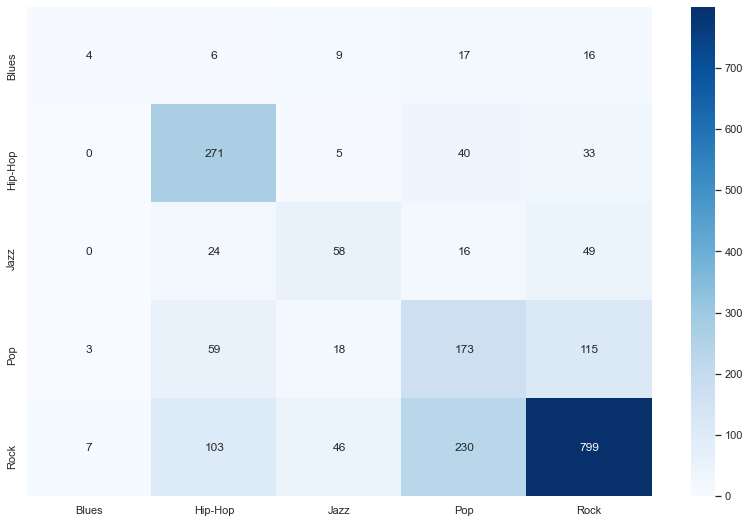

In [992]:
custom_plot_confusion_matrix(confusion_matrix(y_test, grid_search_CV_Stratified_KFold_model_RF.predict(X_test_sc_df)))

In [994]:
# Usando ahora XGBoost Para RandomForest Classifier

In [995]:
from xgboost import XGBRFClassifier

In [996]:
## Usando XG Boosting
model_instance = XGBRFClassifier(n_estimators=1000, subsample=0.9, colsample_bynode=0.2)

gridSearch_params = {'n_estimators':[1000],
                     'max_depth': [None, 3, 5]}


cv_Stratified_KFold = StratifiedKFold(n_splits=3, shuffle=True, random_state=77)

grid_search_CV_Stratified_KFold_model = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)
grid_search_CV_Stratified_KFold_model.fit(X_train_rs, y_train_rs)

scores_Stratified_KFold = cross_val_score(model_instance, X_train_rs, y_train_rs, cv=cv_Stratified_KFold, n_jobs=-1)
mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    

score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.best_score_
params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.best_params_

score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model.score(X_test_sc_df, y_test)
predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.predict(X_test_sc_df)
confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

/Users/rafa/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:54:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Rock       1185
Pop         368
Hip-Hop     349
Jazz        147
Blues        52
Name: _genre_top, dtype: int64

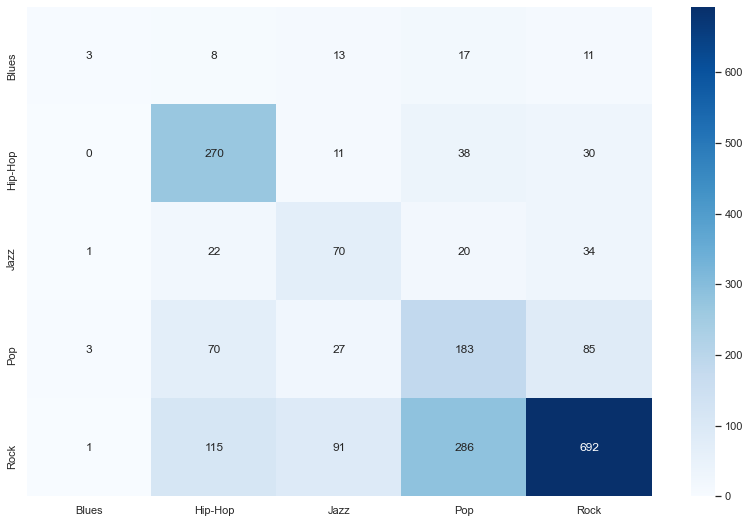

In [997]:
custom_plot_confusion_matrix(confusion_matrix(y_test, grid_search_CV_Stratified_KFold_model.predict(X_test_sc_df)))

y_test.value_counts()[0:5]

In [999]:
params_grid_search_CV_Stratified_KFold_model

{'max_depth': None, 'n_estimators': 1000}

In [1000]:
mean_score_grid_search_CV_Stratified_KFold_model

0.5747619047619049

In [1001]:
std_score_grid_search_CV_Stratified_KFold_model

0.011553549450843083

In [1002]:
score_grid_search_CV_Stratified_KFold_model

0.5747619047619049

In [1003]:
score_grid_search_CV_Stratified_KFold_model_test

0.5797239409804855

In [ ]:
## Noisy data makes XG Random Forest Boost to perfom badly

In [1057]:
genres = ['Hip-Hop', 'Pop', 'Blues', 'Jazz']
echonest_track_ids = set(list(echonest.index))

original_genre_top_selected_genres_ids = ( set(list((tracks_genres_info[tracks_genres_info.genre_top == 'Hip-Hop']).index)) | 
                                           set(list((tracks_genres_info[tracks_genres_info.genre_top == 'Pop']).index))     |
                                           set(list((tracks_genres_info[tracks_genres_info.genre_top == 'Rock']).index))    | 
                                           set(list((tracks_genres_info[tracks_genres_info.genre_top == 'Blues']).index))   | 
                                           set(list((tracks_genres_info[tracks_genres_info.genre_top == 'Jazz']).index)))   

original_genre_top_selected_genres_ids = original_genre_top_selected_genres_ids &  echonest_track_ids # Only the ones that has Echonest features

In [1058]:
print("Original tracks: ", tracks_genres_info[tracks_genres_info.index.isin(original_genre_top_selected_genres_ids)].shape[0])

print(tracks_genres_info[tracks_genres_info.index.isin(original_genre_top_selected_genres_ids)].genre_top.value_counts())

Original tracks:  5455
Rock                   3892
Hip-Hop                 910
Pop                     346
Jazz                    241
Blues                    66
Spoken                    0
Soul-RnB                  0
Old-Time / Historic       0
International             0
Instrumental              0
Folk                      0
Experimental              0
Electronic                0
Easy Listening            0
Country                   0
Classical                 0
Name: genre_top, dtype: int64


In [1121]:
derived_genre_tracks_ids = {} 

for genre in genres:    
    derived_genre_tracks_ids[genre] = set(list(null_top_genre_tracks_df[null_top_genre_tracks_df.derived_genre_top == genre].index)) & (echonest_track_ids)

print("Derived Genre Tracks:")
for genre, ids in derived_genre_tracks_ids.items():
    print(f'\t{genre}: {len(ids)}')
    len(derived_genre_tracks_ids['Pop'])

flat_list_derived_genre_track_ids = sorted({x for v in derived_genre_tracks_ids.values() for x in v})

Derived Genre Tracks:
	Hip-Hop: 487
	Pop: 1127
	Blues: 140
	Jazz: 346


In [1486]:
genre_fatures_df = pd.concat([echonest.echonest.audio_features[echonest.index.isin(original_genre_top_selected_genres_ids)], tracks_info_with_derived_top_genre_df[tracks_info_with_derived_top_genre_df._genre_top.index.isin(original_genre_top_selected_genres_ids)]], 1)

derived_genre_fatures_df = pd.concat([echonest.echonest.audio_features[echonest.index.isin(flat_list_derived_genre_track_ids)], null_top_genre_tracks_df[null_top_genre_tracks_df.derived_genre_top.index.isin(flat_list_derived_genre_track_ids)]], 1)

In [1498]:
genre_fatures_df

derived_genre_fatures_df['genre_top'] = derived_genre_fatures_df.derived_genre_top

derived_genre_fatures_df.genre_top.value_counts()

Pop        1127
Hip-Hop     487
Jazz        346
Blues       140
Name: genre_top, dtype: int64

In [1501]:
X = genre_fatures_df[full_features]
y = genre_fatures_df['genre_top']

In [1505]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

y_train.value_counts()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
36730,0.002562,0.371206,0.948498,0.938766,0.099965,0.118478,120.170,0.052455
75751,0.175495,0.684260,0.682260,0.000092,0.126889,0.038587,89.989,0.332568
14184,0.728182,0.489313,0.301333,0.873091,0.161249,0.057750,75.044,0.614381
36746,0.000028,0.338520,0.988323,0.917932,0.069609,0.110313,143.774,0.089863
27607,0.575338,0.844497,0.454838,0.780293,0.076708,0.064396,130.051,0.352131
...,...,...,...,...,...,...,...,...
1890,0.171406,0.456081,0.680751,0.930712,0.081202,0.028629,107.080,0.496760
21521,0.179581,0.564068,0.743802,0.634654,0.117850,0.036937,128.056,0.813390
4108,0.968047,0.219570,0.457452,0.247248,0.247665,0.079178,164.333,0.229997


In [1507]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_genre_fatures_sc = scaler.fit_transform(X_train)
X_train_sc_df = pd.DataFrame(train_genre_fatures_sc, columns = full_features)

scaler = StandardScaler()
train_genre_fatures_sc = scaler.fit_transform(X_test)
X_test_sc_df = pd.DataFrame(train_genre_fatures_sc, columns = full_features)

In [1509]:
undersampling_ratio = dict(zip(list(y_train.unique()), [1000, 637, 242, 46, 169]))
undersampling_ratio

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC

sampler=RandomUnderSampler(sampling_strategy=undersampling_ratio)
Xu,yu=sampler.fit_resample(X_train_sc_df,y_train)

yu.value_counts()

Rock                   1000
Hip-Hop                 637
Pop                     242
Jazz                    169
Blues                    46
Spoken                    0
Soul-RnB                  0
Old-Time / Historic       0
International             0
Instrumental              0
Folk                      0
Experimental              0
Electronic                0
Easy Listening            0
Country                   0
Classical                 0
Name: genre_top, dtype: int64

In [1510]:
# Extra Hip Hop for Training
extra_hip_hop_train_data = derived_genre_fatures_df[derived_genre_fatures_df.genre_top == 'Hip-Hop'][features + ['tempo']].sample(800 - 637)
Xu = Xu.append(extra_hip_hop_train_data.drop('genre_top', axis=1))
yu = yu.append(extra_hip_hop_train_data.genre_top.sample(800 - 637))

# Extra Pop for Training
extra_pop_train_data = derived_genre_fatures_df[derived_genre_fatures_df.genre_top == 'Pop'][features + ['tempo']].sample(600 - 242)
Xu = Xu.append(extra_pop_train_data.drop('genre_top', axis=1))
yu = yu.append(extra_pop_train_data.genre_top)

# Extra Jazz for Training
extra_jazz_train_data = derived_genre_fatures_df[derived_genre_fatures_df.genre_top == 'Jazz'][features + ['tempo']].sample(400 - 169)
Xu = Xu.append(extra_jazz_train_data.drop('genre_top', axis=1))
yu = yu.append(extra_jazz_train_data.genre_top)
               
# Extra Blues for Training
extra_blues_train_data = derived_genre_fatures_df[derived_genre_fatures_df.genre_top == 'Blues'][features + ['tempo']].sample(170 - 46)
Xu = Xu.append(extra_blues_train_data.drop('genre_top', axis=1))
yu = yu.append(extra_blues_train_data.genre_top)

print(Xu.shape[0], yu.shape[0])

oversampling_ratio = dict(zip(list(y_train.unique()), [1000, 900, 800, 600, 600]))
oversampling_ratio

2970 2970


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,1.261728,-0.575007,-0.773820,8.063280e-01,2.854776,-0.491376,-0.986774,1.617449
1,1.001565,-0.836188,-2.199620,4.341381e-01,-0.500408,-0.460779,0.626639,-1.296759
2,1.212008,-0.502020,-0.394618,8.586130e-01,-0.497575,-0.511054,1.439317,1.931381
3,1.245526,0.561037,0.794464,-5.693496e-01,-0.694870,1.080785,-0.554746,1.070877
4,1.124251,-0.219654,-1.945972,-9.120658e-01,-0.462537,-0.405107,-0.086510,-1.086596
...,...,...,...,...,...,...,...,...
68888,0.879015,0.245698,0.323294,8.921595e-01,0.097173,0.035788,167.734000,0.190317
40624,0.090031,0.242309,0.632375,8.696906e-01,0.549601,0.039939,153.354000,0.136831
40621,0.282828,0.304143,0.815665,7.922177e-01,0.679440,0.039922,85.824000,0.160595
123943,0.803843,0.693968,0.392019,9.989000e-07,0.145262,0.038229,131.808000,0.519248


In [1512]:
categorical_mask=(X_train.dtypes=='category').values
sm=RandomOverSampler(sampling_strategy=oversampling_ratio)
X_train_rs,y_train_rs=sm.fit_resample(Xu,yu)

print(y_train_rs.value_counts())    

Rock       1000
Hip-Hop     900
Pop         800
Jazz        600
Blues       600
Name: genre_top, dtype: int64


In [1494]:
y_test.value_counts()

Rock                   1168
Hip-Hop                 273
Pop                     104
Jazz                     72
Blues                    20
Spoken                    0
Soul-RnB                  0
Old-Time / Historic       0
International             0
Instrumental              0
Folk                      0
Experimental              0
Electronic                0
Easy Listening            0
Country                   0
Classical                 0
Name: genre_top, dtype: int64

In [1495]:
clf_RF = RandomForestClassifier(max_depth=10, random_state=7, n_estimators=500)
clf_RF.fit(X_train_rs, y_train_rs)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=7)

0.8002443494196702
0.5554990509081917
0.5923985016314797
0.5379554083663672


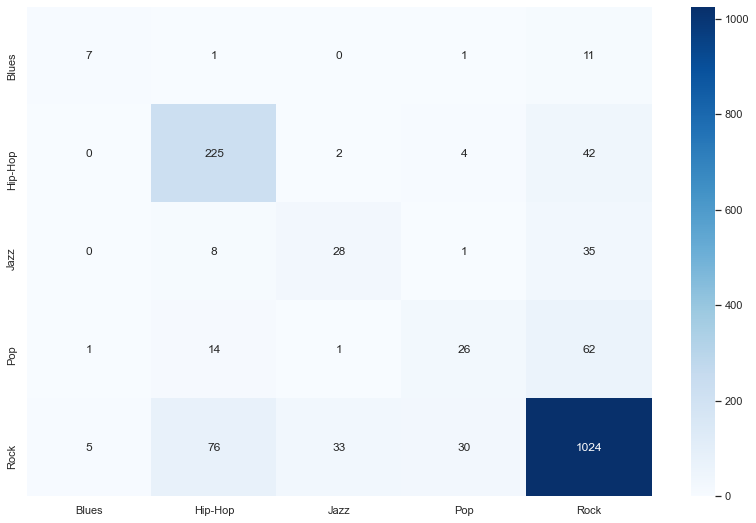

In [1513]:
y_pred = clf_RF.predict(X_test_sc_df)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, clf_RF.predict(X_test_sc_df)))

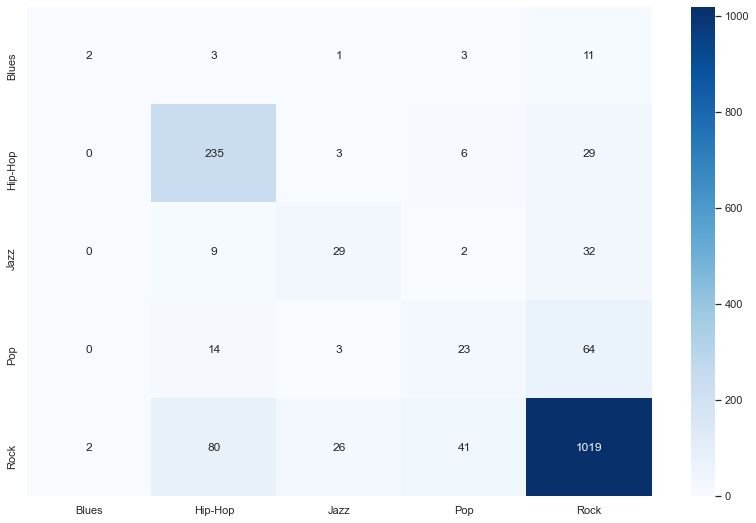

In [1388]:
## Mejorando con GridSearch Stratified KFold   
model_instance = RandomForestClassifier()

gridSearch_params = {'n_estimators':[500, 1000],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 7, 10, 15],
          'min_samples_split': [5, 7],
          'class_weight':[None, 'balanced']}


cv_Stratified_KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

grid_search_CV_Stratified_KFold_model_RF = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)
grid_search_CV_Stratified_KFold_model_RF.fit(X_train_rs, y_train_rs)

scores_Stratified_KFold = cross_val_score(model_instance, X_train_rs, y_train_rs, cv=cv_Stratified_KFold, n_jobs=-1)
mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    

#score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF.best_score_
#params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF.best_params_

score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model_RF.score(X_test_sc_df, y_test)
predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF.predict(X_test_sc_df)
confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

0.7990226023213195
0.4998543717655184
0.5691618489037844
0.49143379831736


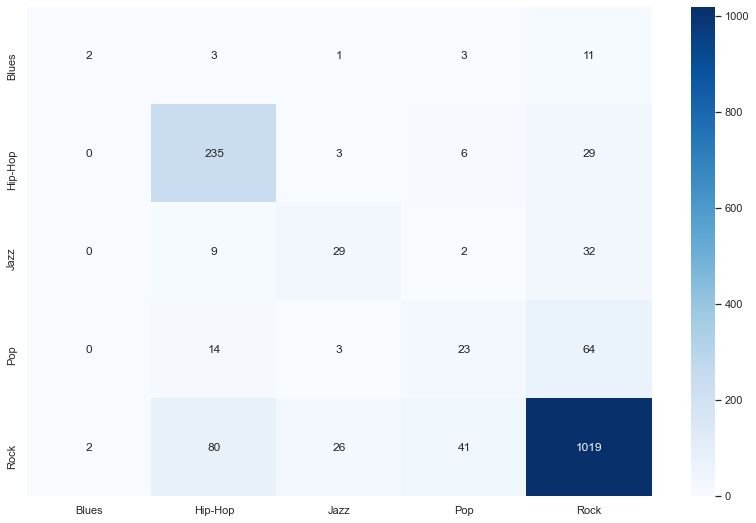

In [1391]:
y_pred = grid_search_CV_Stratified_KFold_model_RF.predict(X_test_sc_df)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, grid_search_CV_Stratified_KFold_model_RF.predict(X_test_sc_df)))

/Users/rafa/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


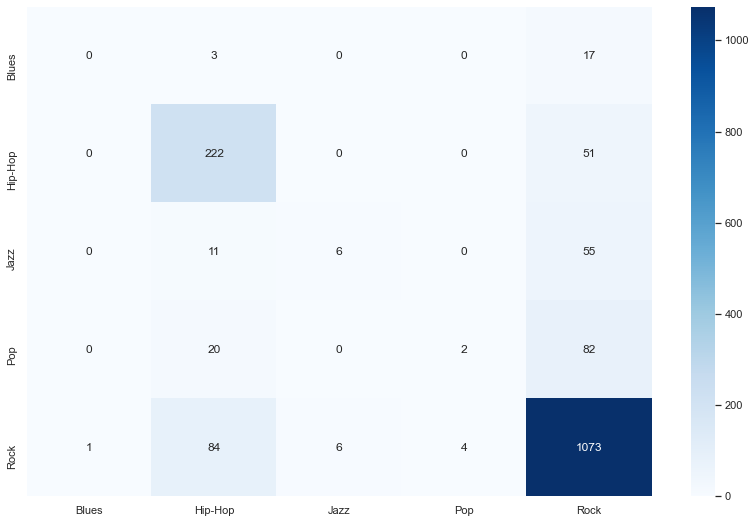

In [1393]:
## Usando XG Boosting
model_instance = XGBRFClassifier(n_estimators=1000, subsample=0.9, colsample_bynode=0.2)

gridSearch_params = {'n_estimators':[500, 1000, 1500],
                     'max_depth': [None, 3,4,5]}


cv_Stratified_KFold = StratifiedKFold(n_splits=4, shuffle=True, random_state=77)

grid_search_CV_Stratified_KFold_model = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)
grid_search_CV_Stratified_KFold_model.fit(X_train_rs, y_train_rs)

scores_Stratified_KFold = cross_val_score(model_instance, X_train_rs, y_train_rs, cv=cv_Stratified_KFold, n_jobs=-1)
mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    

score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.best_score_
params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.best_params_

score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model.score(X_test_sc_df, y_test)
predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model.predict(X_test_sc_df)
confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

0.7959682345754429
0.35617564888336223
0.4651735248089846
0.3668830598625119


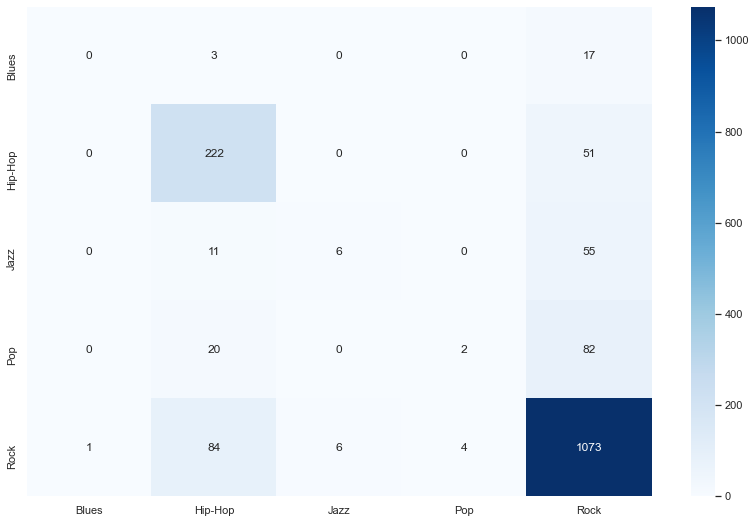

In [1399]:
y_pred = grid_search_CV_Stratified_KFold_model.predict(X_test_sc_df)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [1261]:
# Añadiendo información de anális de audio 
_features = ["chroma_cens", "chroma_cqt", "chroma_stft", "mfcc", "rmse", "spectral_bandwidth", "spectral_contrast", "spectral_rolloff", "tonnetz", "zcr"]
_fields = ["kurtosis", "mean", "std", "median", "max", "min"]

audio_features_df  = features_df[features_df.index.isin(list(genre_fatures_df.index) + list(derived_genre_fatures_df.index))][_features]
audio_features_df.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
134           0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           1.481593  2.691455  0.866868  1.341231  1.347792  1.237658   
3           1.366848  1.054094  0.108103  0.619185  1.038253  1.292235   
5          -0.923192 -0.927232  0.666617  1.038546  0.268932  1.125141   
10          1.770694  1.604566  0.521217  1.982386  4.326824  1.300406   
134         1.199204 -0.175223  0.925482  1.438509  0.123328  0.797199   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.692500  0.569344  0.597041  0.625864  0.567330  0.443949   
3           0.677641  0.584248  0.581271  0.581182  0.454241  0.464841   
5           0.611014  0.651471  0.494528  0.448799  0.468624  0.454021   
10          0.461840  0.540411  0.446708  0.647553  0.591908  0.513306   
134         0.670821  0.596978  0.614920  0.535825  0.617804  0.623351   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.487976  0.497327  0.574435  0.579241  0.620102  0.586945   
3           0.542833  0.664720  0.511329  0.530998  0.603398  0.547428   
5           0.497172  0.559755  0.671287  0.610565  0.551663  0.603413   
10          0.651501  0.516887  0.511479  0.478263  0.638766  0.638495   
134         0.643284  0.551302  0.566937  0.630180  0.638279  0.638279   

feature                                                                 \
statistics      mean                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.474300  0.369816  0.236119  0.228068  0.222830  0.221415   
3           0.232784  0.229469  0.225674  0.216713  0.220512  0.242744   
5           0.258420  0.303385  0.250737  0.218562  0.245743  0.236018   
10          0.229882  0.286978  0.240096  0.226792  0.192443  0.288410   
134         0.249513  0.253561  0.262994  0.212424  0.246259  0.265889   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.229238  0.248795  0.196245  0.175809  0.200713  0.319972   
3           0.369235  0.420716  0.312129  0.242748  0.264292  0.225683   
5           0.275766  0.293982  0.346324  0.289821  0.246368  0.220939   
10          0.413348  0.349137  0.268424  0.243144  0.268941  0.236763   
134         0.259991  0.258319  0.264194  0.312700  0.3

In [1262]:
# Flatten features
tracks_with_extra_audio_features_df = pd.DataFrame(index=audio_features_df.index)
tracks_with_extra_audio_features_df

""
track_id
2
3
5
10
134
...
124856
124857
124862


In [1263]:
## Initializing all needed columns with NaN
for index, row in audio_features_df.head(1).iterrows():
    print(index) # track id
    for feature in _features:
        for field in _fields:
            i = 0
            for k in row[feature][field]: # channel (if it is channel ?)                
                i += 1
                tracks_with_extra_audio_features_df[f'{feature}_{field[0:3]}_{i}'] = np.nan

2


In [1264]:
for index, row in audio_features_df.iterrows():
    for feature in _features:
        for field in _fields:
            i = 0
            for k in row[feature][field]: # channel (if it is channel ?)                
                i += 1
                tracks_with_extra_audio_features_df[f'{feature}_{field[0:3]}_{i}'] = k

In [1265]:
tracks_with_extra_audio_features_df.head()

,chroma_cens_kur_1,chroma_cens_kur_2,chroma_cens_kur_3,chroma_cens_kur_4,chroma_cens_kur_5,chroma_cens_kur_6,chroma_cens_kur_7,chroma_cens_kur_8,chroma_cens_kur_9,chroma_cens_kur_10,chroma_cens_kur_11,chroma_cens_kur_12,chroma_cens_mea_1,chroma_cens_mea_2,chroma_cens_mea_3,chroma_cens_mea_4,chroma_cens_mea_5,chroma_cens_mea_6,chroma_cens_mea_7,chroma_cens_mea_8,chroma_cens_mea_9,chroma_cens_mea_10,chroma_cens_mea_11,chroma_cens_mea_12,chroma_cens_std_1,chroma_cens_std_2,chroma_cens_std_3,chroma_cens_std_4,chroma_cens_std_5,chroma_cens_std_6,chroma_cens_std_7,chroma_cens_std_8,chroma_cens_std_9,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cens_med_1,chroma_cens_med_2,chroma_cens_med_3,chroma_cens_med_4,chroma_cens_med_5,chroma_cens_med_6,chroma_cens_med_7,chroma_cens_med_8,chroma_cens_med_9,chroma_cens_med_10,chroma_cens_med_11,chroma_cens_med_12,chroma_cens_max_1,chroma_cens_max_2,chroma_cens_max_3,chroma_cens_max_4,chroma_cens_max_5,chroma_cens_max_6,chroma_cens_max_7,chroma_cens_max_8,chroma_cens_max_9,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_min_1,chroma_cens_min_2,chroma_cens_min_3,chroma_cens_min_4,chroma_cens_min_5,chroma_cens_min_6,chroma_cens_min_7,chroma_cens_min_8,chroma_cens_min_9,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cqt_kur_1,chroma_cqt_kur_2,chroma_cqt_kur_3,chroma_cqt_kur_4,chroma_cqt_kur_5,chroma_cqt_kur_6,chroma_cqt_kur_7,chroma_cqt_kur_8,chroma_cqt_kur_9,chroma_cqt_kur_10,chroma_cqt_kur_11,chroma_cqt_kur_12,chroma_cqt_mea_1,chroma_cqt_mea_2,chroma_cqt_mea_3,chroma_cqt_mea_4,chroma_cqt_mea_5,chroma_cqt_mea_6,chroma_cqt_mea_7,chroma_cqt_mea_8,chroma_cqt_mea_9,chroma_cqt_mea_10,chroma_cqt_mea_11,chroma_cqt_mea_12,chroma_cqt_std_1,chroma_cqt_std_2,chroma_cqt_std_3,chroma_cqt_std_4,chroma_cqt_std_5,chroma_cqt_std_6,chroma_cqt_std_7,chroma_cqt_std_8,chroma_cqt_std_9,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_cqt_med_1,chroma_cqt_med_2,chroma_cqt_med_3,chroma_cqt_med_4,chroma_cqt_med_5,chroma_cqt_med_6,chroma_cqt_med_7,chroma_cqt_med_8,chroma_cqt_med_9,chroma_cqt_med_10,chroma_cqt_med_11,chroma_cqt_med_12,chroma_cqt_max_1,chroma_cqt_max_2,chroma_cqt_max_3,chroma_cqt_max_4,chroma_cqt_max_5,chroma_cqt_max_6,chroma_cqt_max_7,chroma_cqt_max_8,chroma_cqt_max_9,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_min_1,chroma_cqt_min_2,chroma_cqt_min_3,chroma_cqt_min_4,chroma_cqt_min_5,chroma_cqt_min_6,chroma_cqt_min_7,chroma_cqt_min_8,chroma_cqt_min_9,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_stft_kur_1,chroma_stft_kur_2,chroma_stft_kur_3,chroma_stft_kur_4,chroma_stft_kur_5,chroma_stft_kur_6,chroma_stft_kur_7,chroma_stft_kur_8,chroma_stft_kur_9,chroma_stft_kur_10,chroma_stft_kur_11,chroma_stft_kur_12,chroma_stft_mea_1,chroma_stft_mea_2,chroma_stft_mea_3,chroma_stft_mea_4,chroma_stft_mea_5,chroma_stft_mea_6,chroma_stft_mea_7,chroma_stft_mea_8,chroma_stft_mea_9,chroma_stft_mea_10,chroma_stft_mea_11,chroma_stft_mea_12,chroma_stft_std_1,chroma_stft_std_2,chroma_stft_std_3,chroma_stft_std_4,chroma_stft_std_5,chroma_stft_std_6,chroma_stft_std_7,chroma_stft_std_8,chroma_stft_std_9,chroma_stft_std_10,chroma_stft_std_11,chroma_stft_std_12,chroma_stft_med_1,chroma_stft_med_2,chroma_stft_med_3,chroma_stft_med_4,chroma_stft_med_5,chroma_stft_med_6,chroma_stft_med_7,chroma_stft_med_8,chroma_stft_med_9,chroma_stft_med_10,chroma_stft_med_11,chroma_stft_med_12,chroma_stft_max_1,chroma_stft_max_2,chroma_stft_max_3,chroma_stft_max_4,chroma_stft_max_5,chroma_stft_max_6,chroma_stft_max_7,chroma_stft_max_8,chroma_stft_max_9,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_min_1,chroma_stft_min_2,chroma_stft_min_3,chroma_stft_min_4,chroma_stft_min_5,chroma_stft_min_6,chroma_stft_min_7,chroma_stft_min_8,chroma_stft_min_9,chroma_stft_min_10,chroma_stft_min_11,chroma_stft_min_12,mfcc_kur_1,mfcc_kur_2,mfcc_kur_3,mfcc_kur_4,mfcc_kur_5,mfcc_kur_6,mfcc_kur_7,mfcc_kur_8,mfcc_kur_9,mfcc_kur_10,mfcc_kur_11,mfcc_k

In [1314]:
extra_audio_genre_df = pd.concat([genre_fatures_df, tracks_with_extra_audio_features_df[tracks_with_extra_audio_features_df.index.isin(genre_fatures_df.index)]], 1)

extra_audio_derived_genre_df = pd.concat([derived_genre_fatures_df, tracks_with_extra_audio_features_df[tracks_with_extra_audio_features_df.index.isin(derived_genre_fatures_df.index)]], 1)

extra_audio_genre_df.head()


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top,genres,genres_all,track_id,_genre_top,chroma_cens_kur_1,chroma_cens_kur_2,chroma_cens_kur_3,chroma_cens_kur_4,chroma_cens_kur_5,chroma_cens_kur_6,chroma_cens_kur_7,chroma_cens_kur_8,chroma_cens_kur_9,chroma_cens_kur_10,chroma_cens_kur_11,chroma_cens_kur_12,chroma_cens_mea_1,chroma_cens_mea_2,chroma_cens_mea_3,chroma_cens_mea_4,chroma_cens_mea_5,chroma_cens_mea_6,chroma_cens_mea_7,chroma_cens_mea_8,chroma_cens_mea_9,chroma_cens_mea_10,chroma_cens_mea_11,chroma_cens_mea_12,chroma_cens_std_1,chroma_cens_std_2,chroma_cens_std_3,chroma_cens_std_4,chroma_cens_std_5,chroma_cens_std_6,chroma_cens_std_7,chroma_cens_std_8,chroma_cens_std_9,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cens_med_1,chroma_cens_med_2,chroma_cens_med_3,chroma_cens_med_4,chroma_cens_med_5,chroma_cens_med_6,chroma_cens_med_7,chroma_cens_med_8,chroma_cens_med_9,chroma_cens_med_10,chroma_cens_med_11,chroma_cens_med_12,chroma_cens_max_1,chroma_cens_max_2,chroma_cens_max_3,chroma_cens_max_4,chroma_cens_max_5,chroma_cens_max_6,chroma_cens_max_7,chroma_cens_max_8,chroma_cens_max_9,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_min_1,chroma_cens_min_2,chroma_cens_min_3,chroma_cens_min_4,chroma_cens_min_5,chroma_cens_min_6,chroma_cens_min_7,chroma_cens_min_8,chroma_cens_min_9,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cqt_kur_1,chroma_cqt_kur_2,chroma_cqt_kur_3,chroma_cqt_kur_4,chroma_cqt_kur_5,chroma_cqt_kur_6,chroma_cqt_kur_7,chroma_cqt_kur_8,chroma_cqt_kur_9,chroma_cqt_kur_10,chroma_cqt_kur_11,chroma_cqt_kur_12,chroma_cqt_mea_1,chroma_cqt_mea_2,chroma_cqt_mea_3,chroma_cqt_mea_4,chroma_cqt_mea_5,chroma_cqt_mea_6,chroma_cqt_mea_7,chroma_cqt_mea_8,chroma_cqt_mea_9,chroma_cqt_mea_10,chroma_cqt_mea_11,chroma_cqt_mea_12,chroma_cqt_std_1,chroma_cqt_std_2,chroma_cqt_std_3,chroma_cqt_std_4,chroma_cqt_std_5,chroma_cqt_std_6,chroma_cqt_std_7,chroma_cqt_std_8,chroma_cqt_std_9,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_cqt_med_1,chroma_cqt_med_2,chroma_cqt_med_3,chroma_cqt_med_4,chroma_cqt_med_5,chroma_cqt_med_6,chroma_cqt_med_7,chroma_cqt_med_8,chroma_cqt_med_9,chroma_cqt_med_10,chroma_cqt_med_11,chroma_cqt_med_12,chroma_cqt_max_1,chroma_cqt_max_2,chroma_cqt_max_3,chroma_cqt_max_4,chroma_cqt_max_5,chroma_cqt_max_6,chroma_cqt_max_7,chroma_cqt_max_8,chroma_cqt_max_9,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_min_1,chroma_cqt_min_2,chroma_cqt_min_3,chroma_cqt_min_4,chroma_cqt_min_5,chroma_cqt_min_6,chroma_cqt_min_7,chroma_cqt_min_8,chroma_cqt_min_9,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_stft_kur_1,chroma_stft_kur_2,chroma_stft_kur_3,chroma_stft_kur_4,chroma_stft_kur_5,chroma_stft_kur_6,chroma_stft_kur_7,chroma_stft_kur_8,chroma_stft_kur_9,chroma_stft_kur_10,chroma_stft_kur_11,chroma_stft_kur_12,chroma_stft_mea_1,chroma_stft_mea_2,chroma_stft_mea_3,chroma_stft_mea_4,chroma_stft_mea_5,chroma_stft_mea_6,chroma_stft_mea_7,chroma_stft_mea_8,chroma_stft_mea_9,chroma_stft_mea_10,chroma_stft_mea_11,chroma_stft_mea_12,chroma_stft_std_1,chroma_stft_std_2,chroma_stft_std_3,chroma_stft_std_4,chroma_stft_std_5,chroma_stft_std_6,chroma_stft_std_7,chroma_stft_std_8,chroma_stft_std_9,chroma_stft_std_10,chroma_stft_std_11,chroma_stft_std_12,chroma_stft_med_1,chroma_stft_med_2,chroma_stft_med_3,chroma_stft_med_4,chroma_stft_med_5,chroma_stft_med_6,chroma_stft_med_7,chroma_stft_med_8,chroma_stft_med_9,chroma_stft_med_10,chroma_stft_med_11,chroma_stft_med_12,chroma_stft_max_1,chroma_stft_max_2,chroma_stft_max_3,chroma_stft_max_4,chroma_stft_max_5,chroma_stft_max_6,chroma_stft_max_7,chroma_stft_max_8,chroma_stft_max_9,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_min_1,chroma_stft_min_2,chroma_stft_min_3,chroma_stft_min_4,chroma_stft_min_5,chroma_stft_min_6,chroma_stft_min_7,chroma_stft_min_8,chroma_stft_min_9,chroma_stft_min_10,chroma_stft_min_11,chroma_stft_min

In [1366]:
X = extra_audio_genre_df.drop(['genre_top', '_genre_top', 'genres', 'genres_all', 'track_id'], axis=1)
y = extra_audio_genre_df['genre_top']

X.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,chroma_cens_kur_1,chroma_cens_kur_2,chroma_cens_kur_3,chroma_cens_kur_4,chroma_cens_kur_5,chroma_cens_kur_6,chroma_cens_kur_7,chroma_cens_kur_8,chroma_cens_kur_9,chroma_cens_kur_10,chroma_cens_kur_11,chroma_cens_kur_12,chroma_cens_mea_1,chroma_cens_mea_2,chroma_cens_mea_3,chroma_cens_mea_4,chroma_cens_mea_5,chroma_cens_mea_6,chroma_cens_mea_7,chroma_cens_mea_8,chroma_cens_mea_9,chroma_cens_mea_10,chroma_cens_mea_11,chroma_cens_mea_12,chroma_cens_std_1,chroma_cens_std_2,chroma_cens_std_3,chroma_cens_std_4,chroma_cens_std_5,chroma_cens_std_6,chroma_cens_std_7,chroma_cens_std_8,chroma_cens_std_9,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cens_med_1,chroma_cens_med_2,chroma_cens_med_3,chroma_cens_med_4,chroma_cens_med_5,chroma_cens_med_6,chroma_cens_med_7,chroma_cens_med_8,chroma_cens_med_9,chroma_cens_med_10,chroma_cens_med_11,chroma_cens_med_12,chroma_cens_max_1,chroma_cens_max_2,chroma_cens_max_3,chroma_cens_max_4,chroma_cens_max_5,chroma_cens_max_6,chroma_cens_max_7,chroma_cens_max_8,chroma_cens_max_9,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_min_1,chroma_cens_min_2,chroma_cens_min_3,chroma_cens_min_4,chroma_cens_min_5,chroma_cens_min_6,chroma_cens_min_7,chroma_cens_min_8,chroma_cens_min_9,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cqt_kur_1,chroma_cqt_kur_2,chroma_cqt_kur_3,chroma_cqt_kur_4,chroma_cqt_kur_5,chroma_cqt_kur_6,chroma_cqt_kur_7,chroma_cqt_kur_8,chroma_cqt_kur_9,chroma_cqt_kur_10,chroma_cqt_kur_11,chroma_cqt_kur_12,chroma_cqt_mea_1,chroma_cqt_mea_2,chroma_cqt_mea_3,chroma_cqt_mea_4,chroma_cqt_mea_5,chroma_cqt_mea_6,chroma_cqt_mea_7,chroma_cqt_mea_8,chroma_cqt_mea_9,chroma_cqt_mea_10,chroma_cqt_mea_11,chroma_cqt_mea_12,chroma_cqt_std_1,chroma_cqt_std_2,chroma_cqt_std_3,chroma_cqt_std_4,chroma_cqt_std_5,chroma_cqt_std_6,chroma_cqt_std_7,chroma_cqt_std_8,chroma_cqt_std_9,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_cqt_med_1,chroma_cqt_med_2,chroma_cqt_med_3,chroma_cqt_med_4,chroma_cqt_med_5,chroma_cqt_med_6,chroma_cqt_med_7,chroma_cqt_med_8,chroma_cqt_med_9,chroma_cqt_med_10,chroma_cqt_med_11,chroma_cqt_med_12,chroma_cqt_max_1,chroma_cqt_max_2,chroma_cqt_max_3,chroma_cqt_max_4,chroma_cqt_max_5,chroma_cqt_max_6,chroma_cqt_max_7,chroma_cqt_max_8,chroma_cqt_max_9,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_min_1,chroma_cqt_min_2,chroma_cqt_min_3,chroma_cqt_min_4,chroma_cqt_min_5,chroma_cqt_min_6,chroma_cqt_min_7,chroma_cqt_min_8,chroma_cqt_min_9,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_stft_kur_1,chroma_stft_kur_2,chroma_stft_kur_3,chroma_stft_kur_4,chroma_stft_kur_5,chroma_stft_kur_6,chroma_stft_kur_7,chroma_stft_kur_8,chroma_stft_kur_9,chroma_stft_kur_10,chroma_stft_kur_11,chroma_stft_kur_12,chroma_stft_mea_1,chroma_stft_mea_2,chroma_stft_mea_3,chroma_stft_mea_4,chroma_stft_mea_5,chroma_stft_mea_6,chroma_stft_mea_7,chroma_stft_mea_8,chroma_stft_mea_9,chroma_stft_mea_10,chroma_stft_mea_11,chroma_stft_mea_12,chroma_stft_std_1,chroma_stft_std_2,chroma_stft_std_3,chroma_stft_std_4,chroma_stft_std_5,chroma_stft_std_6,chroma_stft_std_7,chroma_stft_std_8,chroma_stft_std_9,chroma_stft_std_10,chroma_stft_std_11,chroma_stft_std_12,chroma_stft_med_1,chroma_stft_med_2,chroma_stft_med_3,chroma_stft_med_4,chroma_stft_med_5,chroma_stft_med_6,chroma_stft_med_7,chroma_stft_med_8,chroma_stft_med_9,chroma_stft_med_10,chroma_stft_med_11,chroma_stft_med_12,chroma_stft_max_1,chroma_stft_max_2,chroma_stft_max_3,chroma_stft_max_4,chroma_stft_max_5,chroma_stft_max_6,chroma_stft_max_7,chroma_stft_max_8,chroma_stft_max_9,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_min_1,chroma_stft_min_2,chroma_stft_min_3,chroma_stft_min_4,chroma_stft_min_5,chroma_stft_min_6,chroma_stft_min_7,chroma_stft_min_8,chroma_stft_min_9,chroma_stft_min_10,chroma_stft_min_11,chroma_stft_min_12,mfcc_kur_1,mfcc_kur_2,mfcc_kur_3,mfcc_kur_4,

In [1367]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

y_train.value_counts()

Rock                   2724
Hip-Hop                 637
Pop                     242
Jazz                    169
Blues                    46
Spoken                    0
Soul-RnB                  0
Old-Time / Historic       0
International             0
Instrumental              0
Folk                      0
Experimental              0
Electronic                0
Easy Listening            0
Country                   0
Classical                 0
Name: genre_top, dtype: int64

In [1374]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_genre_fatures_sc = scaler.fit_transform(X_train)
X_train_sc_df = pd.DataFrame(train_genre_fatures_sc, columns = X.columns)

scaler = StandardScaler()
train_genre_fatures_sc = scaler.fit_transform(X_test)
X_test_sc_df = pd.DataFrame(train_genre_fatures_sc, columns = X.columns)

In [1375]:
undersampling_ratio = dict(zip(list(y_train.unique()), [1000, 637, 242, 46, 169]))
undersampling_ratio

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC

sampler=RandomUnderSampler(sampling_strategy=undersampling_ratio)
Xu,yu=sampler.fit_resample(X_train_sc_df,y_train)

yu.value_counts()

Rock                   1000
Hip-Hop                 637
Pop                     242
Jazz                    169
Blues                    46
Spoken                    0
Soul-RnB                  0
Old-Time / Historic       0
International             0
Instrumental              0
Folk                      0
Experimental              0
Electronic                0
Easy Listening            0
Country                   0
Classical                 0
Name: genre_top, dtype: int64

In [1376]:
# Extra Hip Hop for Training

cols_to_drop = ['genre_top', 'genres', 'genres_all', 'track_id', 'genres_all_str', 'genres_str', 'derived_genre_top']

extra_hip_hop_train_data = extra_audio_derived_genre_df[extra_audio_derived_genre_df.genre_top == 'Hip-Hop'].sample(800 - 637)
Xu = Xu.append(extra_hip_hop_train_data.drop(cols_to_drop, axis=1))
yu = yu.append(extra_hip_hop_train_data.genre_top.sample(800 - 637))

# Extra Pop for Training
extra_pop_train_data = extra_audio_derived_genre_df[extra_audio_derived_genre_df.genre_top == 'Pop'].sample(600 - 242)
Xu = Xu.append(extra_pop_train_data.drop(cols_to_drop, axis=1))
yu = yu.append(extra_pop_train_data.genre_top)

# Extra Jazz for Training
extra_jazz_train_data = extra_audio_derived_genre_df[extra_audio_derived_genre_df.genre_top == 'Jazz'].sample(400 - 169)
Xu = Xu.append(extra_jazz_train_data.drop(cols_to_drop, axis=1))
yu = yu.append(extra_jazz_train_data.genre_top)
               
# Extra Blues for Training
extra_blues_train_data = extra_audio_derived_genre_df[extra_audio_derived_genre_df.genre_top == 'Blues'].sample(170 - 46)
Xu = Xu.append(extra_blues_train_data.drop(cols_to_drop, axis=1))
yu = yu.append(extra_blues_train_data.genre_top)

print(Xu.shape[0], yu.shape[0])
yu.value_counts()

2970 2970


Rock       1000
Hip-Hop     800
Pop         600
Jazz        400
Blues       170
Name: genre_top, dtype: int64

In [1377]:
oversampling_ratio = dict(zip(list(y_train.unique()), [1000, 900, 800, 600, 600]))
oversampling_ratio

categorical_mask=(X_train_sc_df.dtypes=='category').values
sm=RandomOverSampler(sampling_strategy=oversampling_ratio)
X_train_rs,y_train_rs=sm.fit_resample(Xu,yu)

print(y_train_rs.value_counts())    
X_train_rs

Rock       1000
Hip-Hop     900
Pop         800
Jazz        600
Blues       600
Name: genre_top, dtype: int64


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,chroma_cens_kur_1,chroma_cens_kur_2,chroma_cens_kur_3,chroma_cens_kur_4,chroma_cens_kur_5,chroma_cens_kur_6,chroma_cens_kur_7,chroma_cens_kur_8,chroma_cens_kur_9,chroma_cens_kur_10,chroma_cens_kur_11,chroma_cens_kur_12,chroma_cens_mea_1,chroma_cens_mea_2,chroma_cens_mea_3,chroma_cens_mea_4,chroma_cens_mea_5,chroma_cens_mea_6,chroma_cens_mea_7,chroma_cens_mea_8,chroma_cens_mea_9,chroma_cens_mea_10,chroma_cens_mea_11,chroma_cens_mea_12,chroma_cens_std_1,chroma_cens_std_2,chroma_cens_std_3,chroma_cens_std_4,chroma_cens_std_5,chroma_cens_std_6,chroma_cens_std_7,chroma_cens_std_8,chroma_cens_std_9,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cens_med_1,chroma_cens_med_2,chroma_cens_med_3,chroma_cens_med_4,chroma_cens_med_5,chroma_cens_med_6,chroma_cens_med_7,chroma_cens_med_8,chroma_cens_med_9,chroma_cens_med_10,chroma_cens_med_11,chroma_cens_med_12,chroma_cens_max_1,chroma_cens_max_2,chroma_cens_max_3,chroma_cens_max_4,chroma_cens_max_5,chroma_cens_max_6,chroma_cens_max_7,chroma_cens_max_8,chroma_cens_max_9,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_min_1,chroma_cens_min_2,chroma_cens_min_3,chroma_cens_min_4,chroma_cens_min_5,chroma_cens_min_6,chroma_cens_min_7,chroma_cens_min_8,chroma_cens_min_9,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cqt_kur_1,chroma_cqt_kur_2,chroma_cqt_kur_3,chroma_cqt_kur_4,chroma_cqt_kur_5,chroma_cqt_kur_6,chroma_cqt_kur_7,chroma_cqt_kur_8,chroma_cqt_kur_9,chroma_cqt_kur_10,chroma_cqt_kur_11,chroma_cqt_kur_12,chroma_cqt_mea_1,chroma_cqt_mea_2,chroma_cqt_mea_3,chroma_cqt_mea_4,chroma_cqt_mea_5,chroma_cqt_mea_6,chroma_cqt_mea_7,chroma_cqt_mea_8,chroma_cqt_mea_9,chroma_cqt_mea_10,chroma_cqt_mea_11,chroma_cqt_mea_12,chroma_cqt_std_1,chroma_cqt_std_2,chroma_cqt_std_3,chroma_cqt_std_4,chroma_cqt_std_5,chroma_cqt_std_6,chroma_cqt_std_7,chroma_cqt_std_8,chroma_cqt_std_9,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_cqt_med_1,chroma_cqt_med_2,chroma_cqt_med_3,chroma_cqt_med_4,chroma_cqt_med_5,chroma_cqt_med_6,chroma_cqt_med_7,chroma_cqt_med_8,chroma_cqt_med_9,chroma_cqt_med_10,chroma_cqt_med_11,chroma_cqt_med_12,chroma_cqt_max_1,chroma_cqt_max_2,chroma_cqt_max_3,chroma_cqt_max_4,chroma_cqt_max_5,chroma_cqt_max_6,chroma_cqt_max_7,chroma_cqt_max_8,chroma_cqt_max_9,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_min_1,chroma_cqt_min_2,chroma_cqt_min_3,chroma_cqt_min_4,chroma_cqt_min_5,chroma_cqt_min_6,chroma_cqt_min_7,chroma_cqt_min_8,chroma_cqt_min_9,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_stft_kur_1,chroma_stft_kur_2,chroma_stft_kur_3,chroma_stft_kur_4,chroma_stft_kur_5,chroma_stft_kur_6,chroma_stft_kur_7,chroma_stft_kur_8,chroma_stft_kur_9,chroma_stft_kur_10,chroma_stft_kur_11,chroma_stft_kur_12,chroma_stft_mea_1,chroma_stft_mea_2,chroma_stft_mea_3,chroma_stft_mea_4,chroma_stft_mea_5,chroma_stft_mea_6,chroma_stft_mea_7,chroma_stft_mea_8,chroma_stft_mea_9,chroma_stft_mea_10,chroma_stft_mea_11,chroma_stft_mea_12,chroma_stft_std_1,chroma_stft_std_2,chroma_stft_std_3,chroma_stft_std_4,chroma_stft_std_5,chroma_stft_std_6,chroma_stft_std_7,chroma_stft_std_8,chroma_stft_std_9,chroma_stft_std_10,chroma_stft_std_11,chroma_stft_std_12,chroma_stft_med_1,chroma_stft_med_2,chroma_stft_med_3,chroma_stft_med_4,chroma_stft_med_5,chroma_stft_med_6,chroma_stft_med_7,chroma_stft_med_8,chroma_stft_med_9,chroma_stft_med_10,chroma_stft_med_11,chroma_stft_med_12,chroma_stft_max_1,chroma_stft_max_2,chroma_stft_max_3,chroma_stft_max_4,chroma_stft_max_5,chroma_stft_max_6,chroma_stft_max_7,chroma_stft_max_8,chroma_stft_max_9,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_min_1,chroma_stft_min_2,chroma_stft_min_3,chroma_stft_min_4,chroma_stft_min_5,chroma_stft_min_6,chroma_stft_min_7,chroma_stft_min_8,chroma_stft_min_9,chroma_stft_min_10,chroma_stft_min_11,chroma_stft_min_12,mfcc_kur_1,mfcc_kur_2,mfcc_kur_3,mfcc_kur_4,

In [1400]:
clf_RF_extra_audio = RandomForestClassifier(max_depth=10, random_state=7, n_estimators=500)
clf_RF_extra_audio.fit(X_train_rs, y_train_rs)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=7)

0.8051313378130727
0.49841288308619447
0.6153225197930496
0.4824519126231455


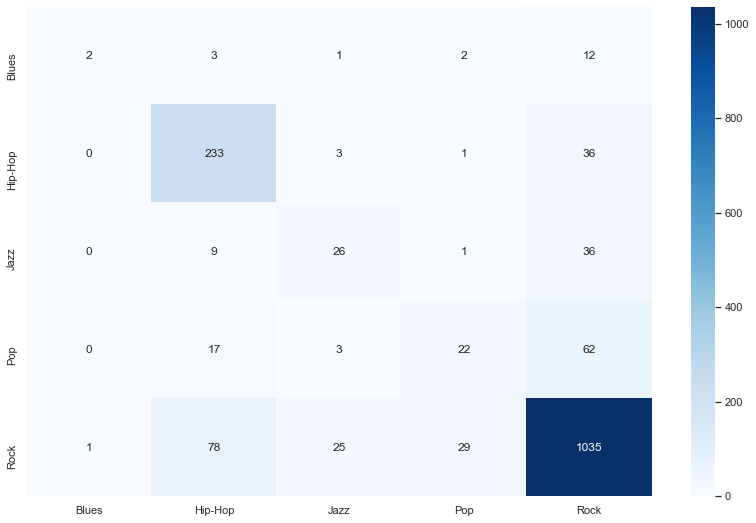

In [1401]:
# Para Todos los casos de prueba

y_pred = clf_RF_extra_audio.predict(X_test_sc_df)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [1383]:
import time

In [1402]:
## Mejorando con GridSearch Stratified KFold   
model_instance = RandomForestClassifier()

gridSearch_params = {'n_estimators':[500, 1000],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 7, 10, 15],
          'min_samples_split': [5, 7],
          'class_weight':[None, 'balanced']}

start = time.time()
cv_Stratified_KFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

grid_search_CV_Stratified_KFold_model_RF_extra_audio = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)
grid_search_CV_Stratified_KFold_model_RF_extra_audio.fit(X_train_rs, y_train_rs)
stop = time.time()
print(f"Training time: {stop - start}s")

scores_Stratified_KFold = cross_val_score(model_instance, X_train_rs, y_train_rs, cv=cv_Stratified_KFold, n_jobs=-1)
mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    

#score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF.best_score_
#params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF.best_params_

score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model_RF_extra_audio.score(X_test_sc_df, y_test)
predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_RF_extra_audio.predict(X_test_sc_df)
confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

Training time: 398.45508193969727s


0.7990226023213195
0.4998543717655184
0.5691618489037844
0.49143379831736


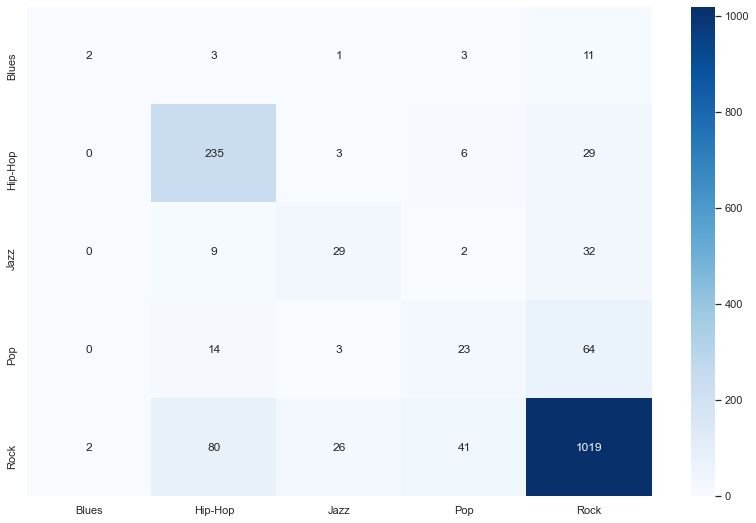

In [1403]:
y_pred = grid_search_CV_Stratified_KFold_model_RF.predict(X_test_sc_df)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [1404]:
## Usando XG Boosting
model_instance = XGBRFClassifier(n_estimators=1000, subsample=0.9, colsample_bynode=0.2)

gridSearch_params = {'n_estimators':[500, 1000, 1500],
                     'max_depth': [None, 3,4,5]}

start = time.time()
cv_Stratified_KFold = StratifiedKFold(n_splits=4, shuffle=True, random_state=77)

grid_search_CV_Stratified_KFold_model_extra_audio = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)
grid_search_CV_Stratified_KFold_model_extra_audio.fit(X_train_rs, y_train_rs)
stop = time.time()
print(f"Training time: {stop - start}s")

scores_Stratified_KFold = cross_val_score(model_instance, X_train_rs, y_train_rs, cv=cv_Stratified_KFold, n_jobs=-1)
mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    

score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio.best_score_
params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio.best_params_

score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model_extra_audio.score(X_test_sc_df, y_test)
predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio.predict(X_test_sc_df)
confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

/Users/rafa/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 630.8298790454865s


0.7959682345754429
0.35617564888336223
0.4651735248089846
0.3668830598625119


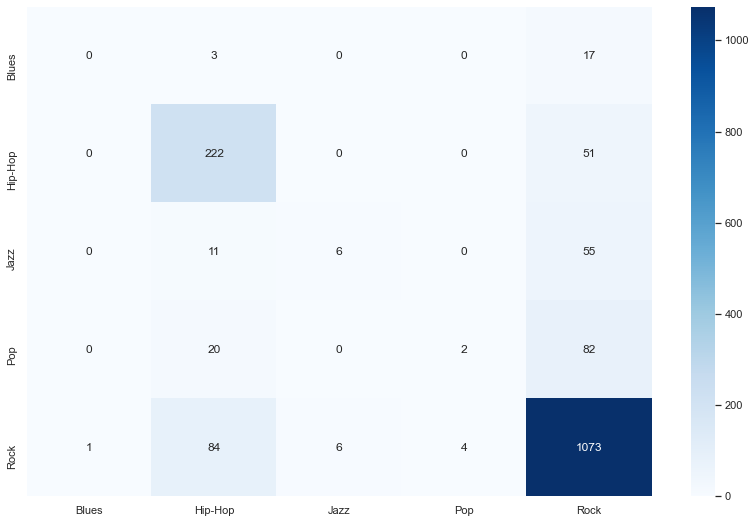

In [1405]:
y_pred = grid_search_CV_Stratified_KFold_model.predict(X_test_sc_df)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [1514]:
# Aplicando Reducción de dimensionalidad (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components = 7, random_state=7)
X_train_pca = pca.fit_transform(X_train_sc_df)
X_test_pca = pca.transform(X_test_sc_df)

In [1515]:
explained_variance = pca.explained_variance_ratio_

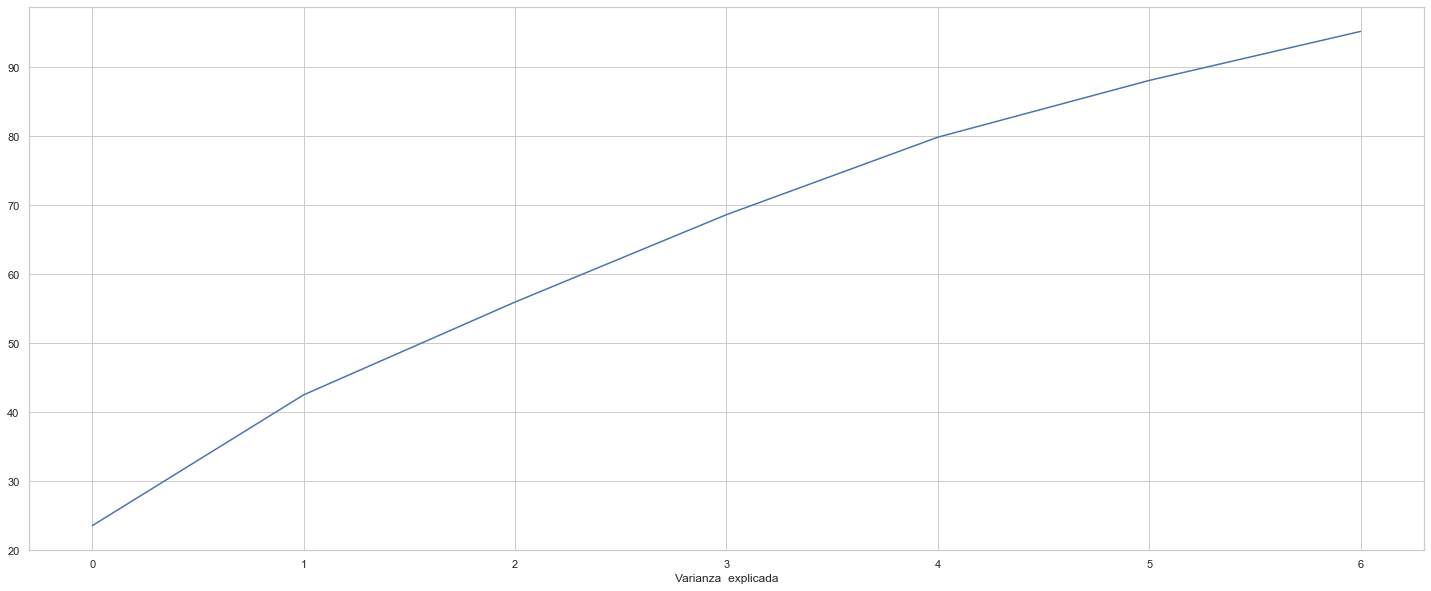

In [1516]:
plt.plot(np.cumsum(explained_variance[0:10] * 100))
plt.xlabel('Número de Componentes')
plt.xlabel('Varianza  explicada')
plt.savefig('elbow_plot.png', dpi=80)

In [1517]:
# Undersampling 

undersampling_ratio = dict(zip(list(y_train.unique()), [1000, 637, 242, 46, 169]))
undersampling_ratio

{'Rock': 1000, 'Hip-Hop': 637, 'Pop': 242, 'Blues': 46, 'Jazz': 169}

In [1518]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

sampler=RandomUnderSampler(sampling_strategy=undersampling_ratio)
Xu_pca,yu_pca=sampler.fit_resample(X_train_pca,y_train)

yu_pca.value_counts()

Rock                   1000
Hip-Hop                 637
Pop                     242
Jazz                    169
Blues                    46
Spoken                    0
Soul-RnB                  0
Old-Time / Historic       0
International             0
Instrumental              0
Folk                      0
Experimental              0
Electronic                0
Easy Listening            0
Country                   0
Classical                 0
Name: genre_top, dtype: int64

In [1519]:
oversampling_ratio = dict(zip(list(y_train.unique()), [1000, 800, 550, 400, 600]))
oversampling_ratio

{'Rock': 1000, 'Hip-Hop': 800, 'Pop': 550, 'Blues': 400, 'Jazz': 600}

In [1520]:
categorical_mask=(X_train_sc_df.dtypes=='category').values
sm=RandomOverSampler(sampling_strategy=oversampling_ratio)
X_train_rs_pca,y_train_rs_pca=sm.fit_resample(Xu_pca,yu_pca)

print(y_train_rs.value_counts())    

Rock       1000
Hip-Hop     900
Pop         800
Jazz        600
Blues       600
Name: genre_top, dtype: int64


In [1529]:
y_test.value_counts()

X_test_pca.shape

(1637, 7)

In [1538]:
clf_RF_pca = RandomForestClassifier(max_depth=20, random_state=7, n_estimators=1000)
clf_RF_pca.fit(X_train_rs_pca, y_train_rs_pca)

RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=7)

0.7611484422724496
0.4752092672007113
0.4863192353028801
0.48200001672604414


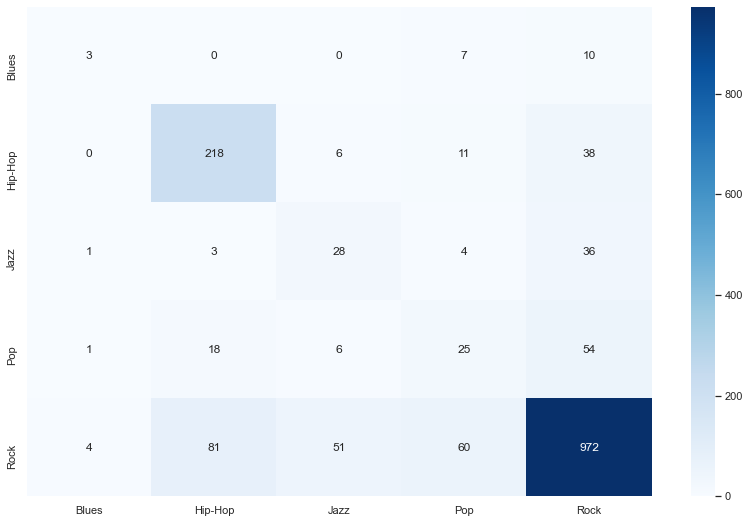

In [1539]:
y_pred = clf_RF_pca.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [1547]:
## Usando XG Boosting
model_instance = XGBRFClassifier(subsample=0.9, colsample_bynode=0.2, eval_metric=["error", "logloss"])

gridSearch_params = {'n_estimators':[50, 100, 300],
                     'max_depth': [None, 3,4,5],
                     'learning_rate': [0.01, 0.1]}

start = time.time()
cv_Stratified_KFold = StratifiedKFold(n_splits=3, shuffle=True, random_state=77)

grid_search_CV_Stratified_KFold_model_extra_audio_pca = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold)
grid_search_CV_Stratified_KFold_model_extra_audio_pca.fit(X_train_rs_pca, y_train_rs_pca)
stop = time.time()
print(f"Training time: {stop - start}s")

scores_Stratified_KFold = cross_val_score(model_instance, X_train_rs, y_train_rs, cv=cv_Stratified_KFold, n_jobs=-1)
mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    

score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio_pca.best_score_
params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio_pca.best_params_

score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model_extra_audio_pca.score(X_test_pca, y_test)
predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio_pca.predict(X_test_pca)
confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

/Users/rafa/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:53:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 99.65710401535034s


0.7214416615760537
0.4463110085188724
0.4427839660199563
0.4770028183384348


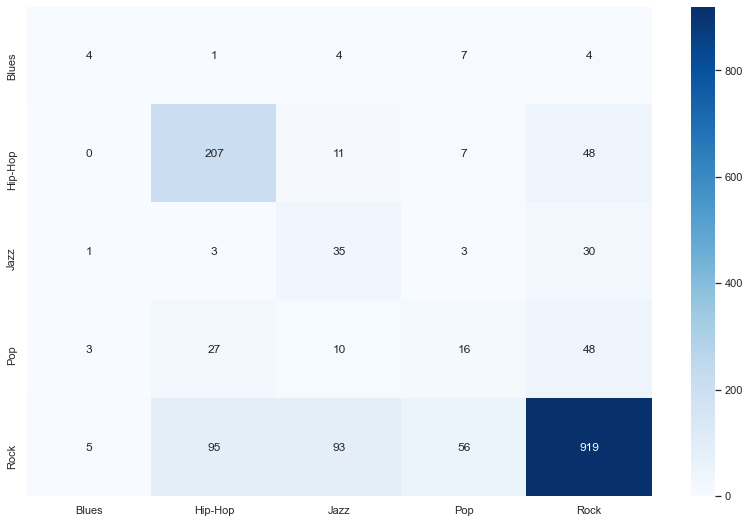

In [1549]:
y_pred = grid_search_CV_Stratified_KFold_model_extra_audio_pca.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [ ]:
## Usando XG Boosting - Cambiando Métrica

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

model_instance = XGBRFClassifier(eval_metric=["error", "logloss"])

gridSearch_params = {
                     'n_estimators': [5, 50, 100, 500, 1000],
                     'max_depth': [3, 4],
                     'learning_rate': [0.01, 0.1],
                     'min_child_weight': [1, 5, 10],
                     'gamma': [0.5, 1, 1.5, 2, 5],
                     'subsample': [0.6, 0.8, 1.0],
                     'colsample_bytree': [0.3, 0.6, 0.8],
                     'colsample_bynode': [0.2, 0.4, 0.6]
                    }

start = time.time()
cv_Stratified_KFold = StratifiedKFold(n_splits=3, shuffle=True, random_state=105)

grid_search_CV_Stratified_KFold_model_extra_audio_pca_ht = GridSearchCV(model_instance, gridSearch_params, n_jobs=-1, cv = cv_Stratified_KFold, verbose=3)
grid_search_CV_Stratified_KFold_model_extra_audio_pca_ht.fit(X_train_rs_pca, y_train_rs_pca)
stop = time.time()
print(f"Training time: {stop - start}s")

scores_Stratified_KFold = cross_val_score(model_instance, X_train_rs, y_train_rs, cv=cv_Stratified_KFold, n_jobs=-1)
mean_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.mean()
std_score_grid_search_CV_Stratified_KFold_model = scores_Stratified_KFold.std()    

score_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio_pca_ht.best_score_
params_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio_pca_ht.best_params_

score_grid_search_CV_Stratified_KFold_model_test = grid_search_CV_Stratified_KFold_model_extra_audio_pca_ht.score(X_test_pca, y_test)
predictions_grid_search_CV_Stratified_KFold_model = grid_search_CV_Stratified_KFold_model_extra_audio_pca_ht.predict(X_test_pca)
confusion_matrix_grid_search_CV_Stratified_KFold_model = metrics.confusion_matrix(y_test, predictions_grid_search_CV_Stratified_KFold_model)

Fitting 3 folds for each of 8100 candidates, totalling 24300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 84.3min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 104.9min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 129.8min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 155.0min


In [ ]:
y_pred = grid_search_CV_Stratified_KFold_model_extra_audio_pca_ht.predict(X_test_pca)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))    
custom_plot_confusion_matrix(confusion_matrix(y_test, y_pred))